## 0. Configs

In [171]:
import warnings
warnings.filterwarnings("ignore")

## 1. Import libraries and data

In [172]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/train_V2.csv")
df.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,...,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


## 2. Survey the data

### **General dataset information**

In [173]:
df.columns

Index(['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc',
       'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic',
       'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd',
       'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit',
       'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl',
       'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size',
       'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no',
       'claims_am', 'nights_booked', 'gender', 'shop_am', 'shop_use',
       'retired', 'gold_status', 'score1_pos', 'score1_neg', 'score2_pos',
       'score2_neg', 'score3_pos', 'score3_neg', 'score4_pos', 'score4_neg',
       'score5_pos', 'score5_neg', 'outcome_profit', 'outcome_damage_inc',
       'outcome_damage_amount'],
      dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

In [175]:
df.describe()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,...,1.304000e+03,1.261000e+03,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,...,4.967340e-01,4.942801e-01,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,...,2.897994e-01,2.899165e-01,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.454209e-01,2.405574e-01,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,...,4.985832e-01,4.942465e-01,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,...,7.474935e-01,7.449235e-01,7.464826e-01,7.452133e-01,7.493876e-01,7.512817e-01,7.357425,2223.712500,1.000000,202.612500
max,360577.000000,150537.000000,100577.000000,14866.000000,10.000000,30000.000000,1.000000,1.000000,1.000000,1.000000,...,9.986510e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.993125e-01,9.999999e-01,14.776319,31529.000000,1.000000,3157.240000


### **Missing values**

Create DataFrame of missing values per feature

In [176]:
missing_values = df.isna().sum()

missing = pd.DataFrame({'feature': missing_values.index, 'missing': missing_values.values}) \
    .reset_index(drop=True) \
    .sort_values(by="missing", ascending=False)

only retain features that have missing values

In [177]:
missing = missing[missing["missing"] > 0]

In [178]:
missing.head()

,feature,missing
42,score2_pos,3791
46,score4_pos,3777
40,score1_pos,3775
48,score5_pos,3768
44,score3_pos,3739


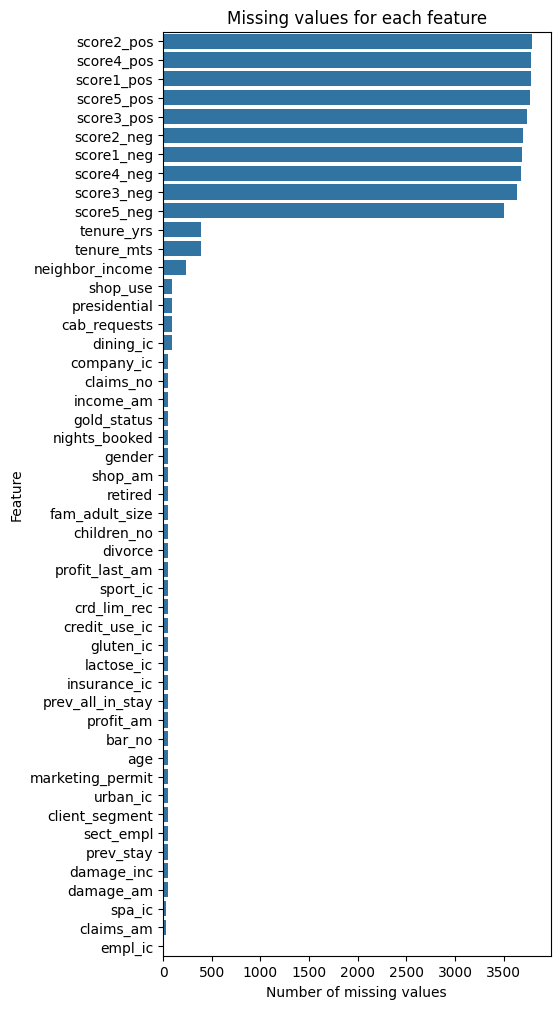

In [179]:
plt.figure(figsize = (5, 12))
sns.barplot(missing, x="missing", y="feature")
plt.title("Missing values for each feature")
plt.xlabel("Number of missing values")
plt.ylabel("Feature")
plt.show()

### **Correlation**

Not really useful, so commented out

In [180]:
# numerical_columns = df.select_dtypes(include="number")
# correlation_matrix = numerical_columns.corr()

# plt.figure(figsize=(25, 25))
# sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
# plt.tight_layout()
# plt.show()

### **Distribution**

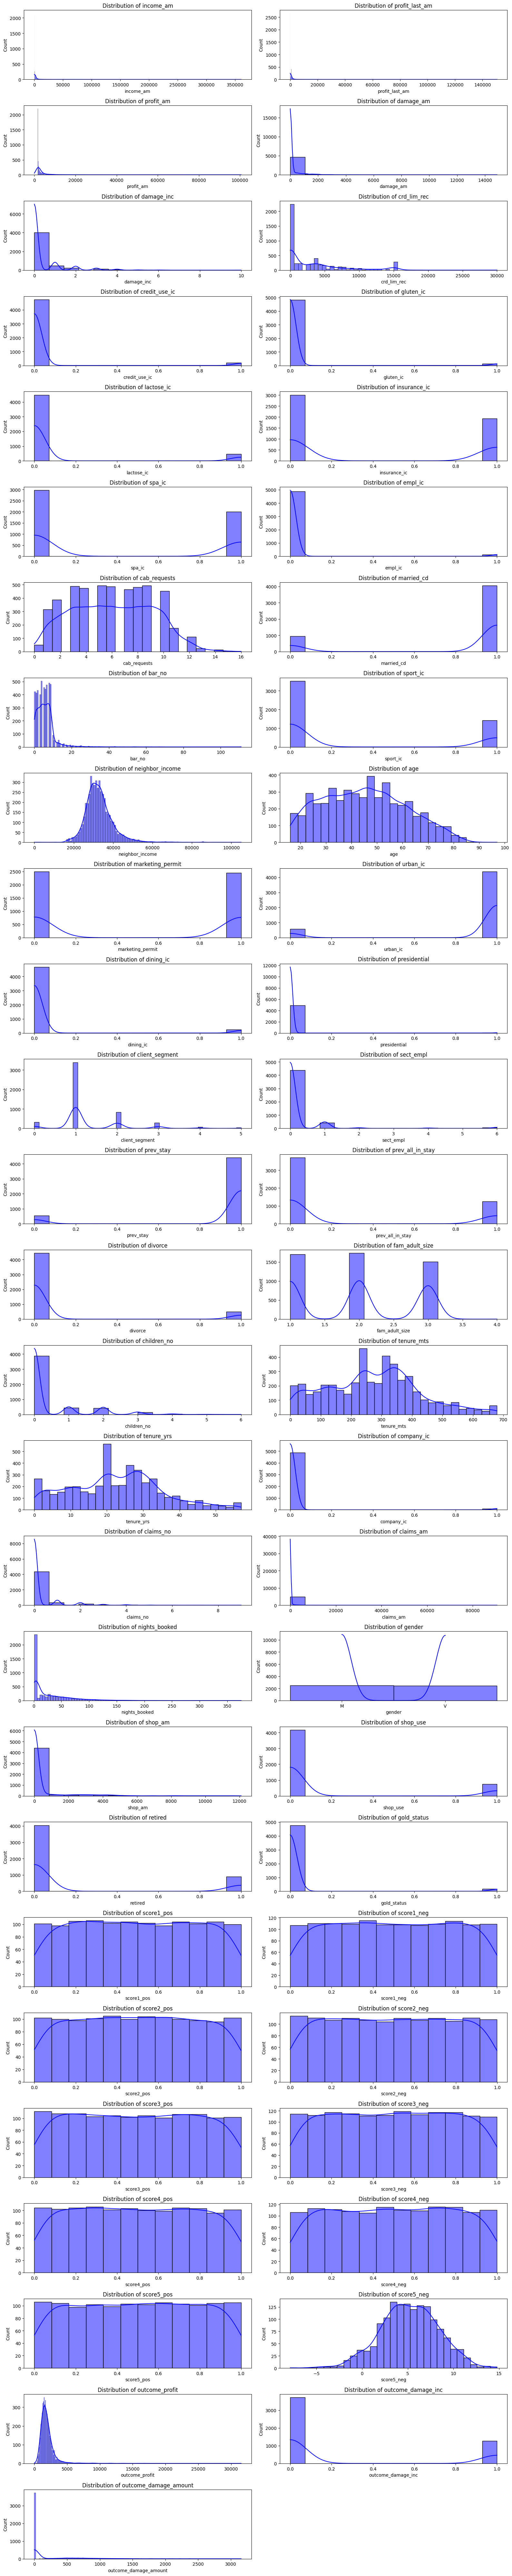

In [181]:
num_rows = (len(df.columns) + 1) // 2  # Ensure we have enough rows for all columns
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 80))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=True, color='blue', edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {column}')

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Categorical Data Exploration**

The only categorical column is "gender", so I won't plot it

It's also in the full distribution plot, but it's too small to make out the distribution

In [182]:
categorical_columns = df.select_dtypes(include='object')
categorical_columns["gender"].value_counts()

gender
M    2490
V    2457
Name: count, dtype: int64

## 3. Deal with data issues

import necessary libraries again so you can run the Jupyter Notebook from here

In [183]:
import warnings
warnings.filterwarnings("ignore")

In [184]:
import pandas as pd

df = pd.read_csv("./data/train_V2.csv")

df.shape

(5000, 53)

### **Appropriately handle categorical data**

Handle missing values for categorical variables

In [185]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# drop entries if they have a missing value for gender, "score.csv" does not contain missing values for gender, so it does not make sense to train the model on missing genders
df.dropna(subset=['gender'], inplace=True)
df.shape

(4947, 53)

One-hot-encoding

In [186]:
df_encoded = pd.get_dummies(df, columns=["gender"], dtype="int")
df_encoded.shape

(4947, 54)

### **Treat missing data**

Fill rows, that have a high number of missing values, with the mean value for that feature

In [187]:
df_filled = df_encoded.fillna(df_encoded.mean())
df_filled.shape

(4947, 54)

Drop columns that have a high number of missing values

> *I dropped these columns because they are missing too many values to impute (in my not-very professional opinion). They are missing ~ 3500 values out of 5000.*

In [188]:
df_filled.drop(['score1_pos', 'score1_neg', 'score2_pos', 'score2_neg', 'score3_pos', 'score3_neg', 'score4_pos', 'score4_neg', 'score5_pos', 'score5_neg'], axis=1, inplace=True)
df_filled.shape

(4947, 44)

### **Identify outliers, and choose whether to make your analysis more robust by removing these**

Identify outliers

In [189]:
dataset = df_filled

def identify_outliers(dataset, threshold=3):
    z_scores = np.abs((dataset - dataset.mean()) / dataset.std())
    outliers = (z_scores > threshold).any(axis=1)
    return outliers

outliers = identify_outliers(dataset)

and choose whether to remove them

In [190]:
remove_outliers = True

In [191]:
if remove_outliers:
    df_no_outliers = dataset[~outliers]

df_no_outliers.shape

(3371, 44)

Export `df_no_outliers` to CSV

In [192]:
df_no_outliers.to_csv("./data/cleaned/train_V2_cleaned.csv", index=False)